<a href="https://colab.research.google.com/github/ShreshthSaxena/ML/blob/master/Time_Series_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

In [0]:
from google.colab import files
files.upload()

Saving time-series.csv to time-series.csv


{'time-series.csv': b'Datetime,AEP_MW\n2004-12-31 01:00:00,13478.0\n2004-12-31 02:00:00,12865.0\n2004-12-31 03:00:00,12577.0\n2004-12-31 04:00:00,12517.0\n2004-12-31 05:00:00,12670.0\n2004-12-31 06:00:00,13038.0\n2004-12-31 07:00:00,13692.0\n2004-12-31 08:00:00,14297.0\n2004-12-31 09:00:00,14719.0\n2004-12-31 10:00:00,14941.0\n2004-12-31 11:00:00,15184.0\n2004-12-31 12:00:00,15009.0\n2004-12-31 13:00:00,14808.0\n2004-12-31 14:00:00,14522.0\n2004-12-31 15:00:00,14349.0\n2004-12-31 16:00:00,14107.0\n2004-12-31 17:00:00,14410.0\n2004-12-31 18:00:00,15174.0\n2004-12-31 19:00:00,15261.0\n2004-12-31 20:00:00,14774.0\n2004-12-31 21:00:00,14363.0\n2004-12-31 22:00:00,14045.0\n2004-12-31 23:00:00,13478.0\n2005-01-01 00:00:00,12892.0\n2004-12-30 01:00:00,14097.0\n2004-12-30 02:00:00,13667.0\n2004-12-30 03:00:00,13451.0\n2004-12-30 04:00:00,13379.0\n2004-12-30 05:00:00,13506.0\n2004-12-30 06:00:00,14121.0\n2004-12-30 07:00:00,15066.0\n2004-12-30 08:00:00,15771.0\n2004-12-30 09:00:00,16047.0\n2004

In [0]:
import pandas as pd
import numpy
import math

In [0]:
data = pd.read_csv('time-series.csv')

In [0]:
data.dtypes

Datetime     object
AEP_MW      float64
dtype: object

In [0]:
data['Datetime']=pd.to_datetime(data['Datetime'])
data.sort_values(by = 'Datetime', ascending = True, inplace = True)
data.head()

Datetime   AEP_MW
2183 2004-10-01 01:00:00  12379.0
2184 2004-10-01 02:00:00  11935.0
2185 2004-10-01 03:00:00  11692.0
2186 2004-10-01 04:00:00  11597.0
2187 2004-10-01 05:00:00  11681.0

In [0]:
test = data.set_index('Datetime').last('1Y')
train = data[:-test.shape[0]].set_index('Datetime')

In [0]:
# df = pd.DataFrame()
# df['date'] = [d.date() for d in data['Datetime']]
# df['time'] = [d.time() for d in data['Datetime']]
# df['consumption'] = data['AEP_MW']
# df.set_index(['date', 'time'])

## Viz

In [0]:
import matplotlib.pyplot as plt

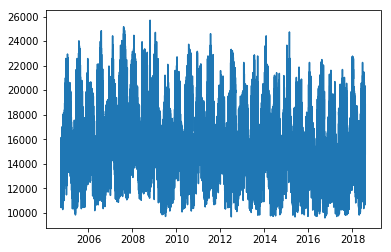

In [0]:
plt.plot(data.set_index('Datetime'))
plt.show()

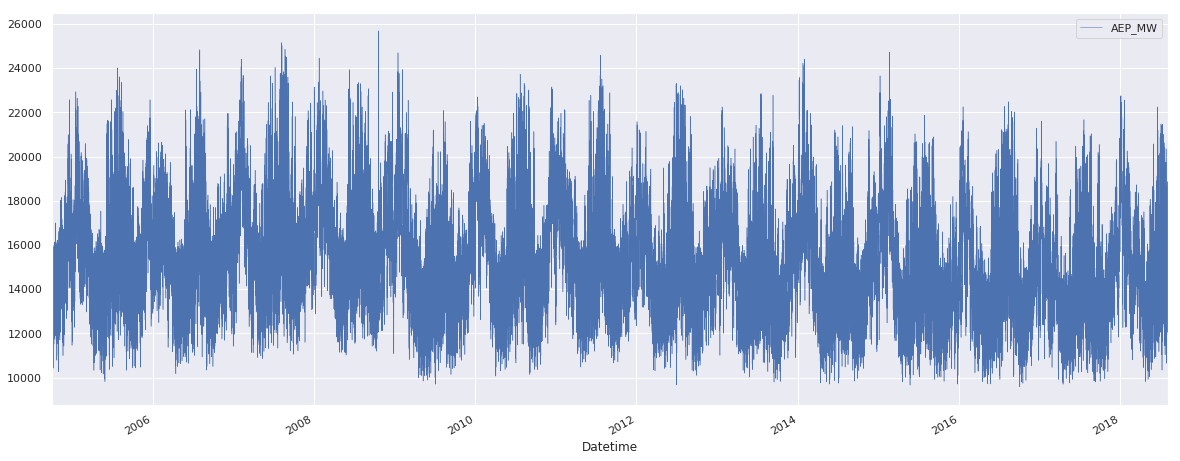

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})
data.set_index('Datetime').plot(linewidth=0.5)

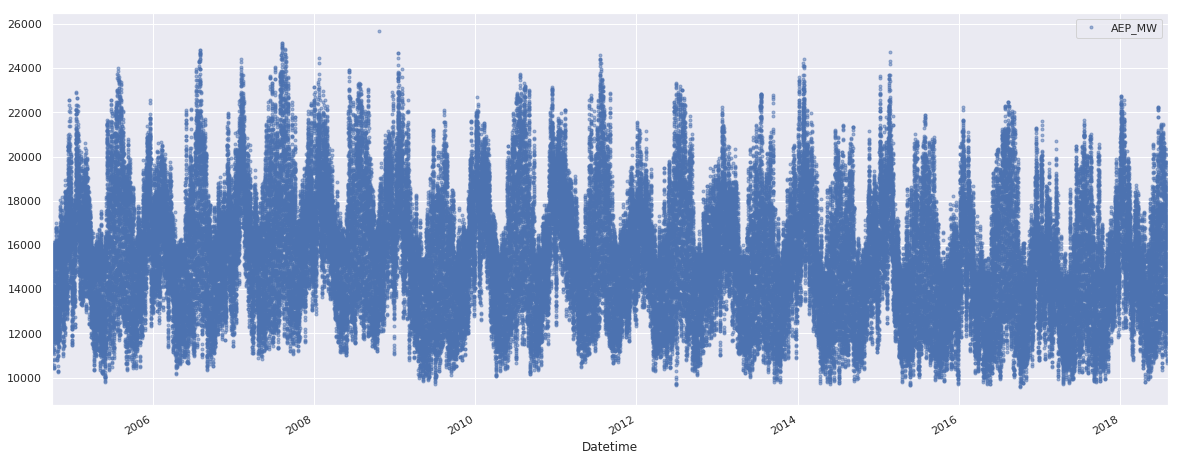

In [0]:
data.set_index('Datetime').plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 8))

Text(0, 0.5, 'Daily Consumption (MW)')

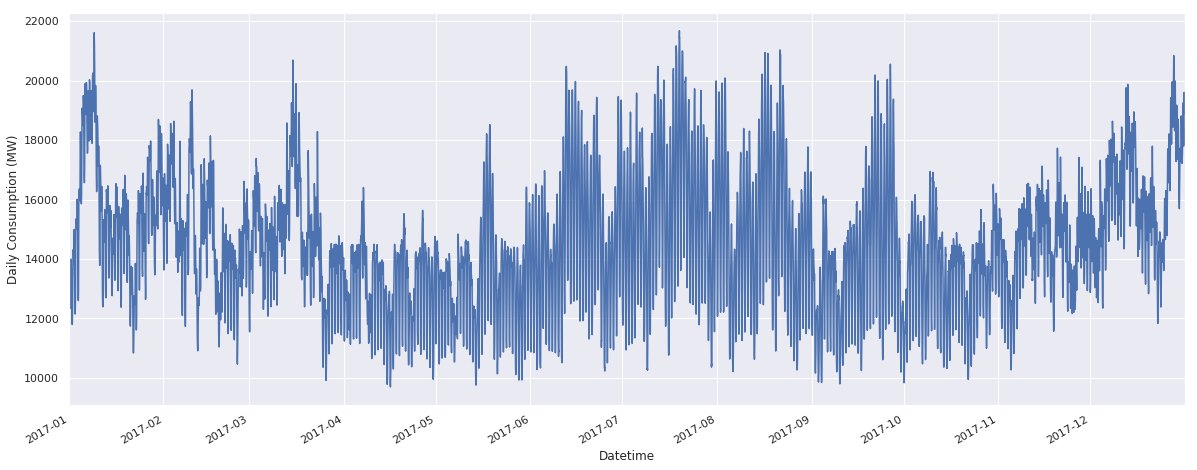

In [0]:
ax = data.set_index('Datetime').loc['2017', 'AEP_MW'].plot()
ax.set_ylabel('Daily Consumption (MW)')

Text(0, 0.5, 'Daily Consumption (MW)')

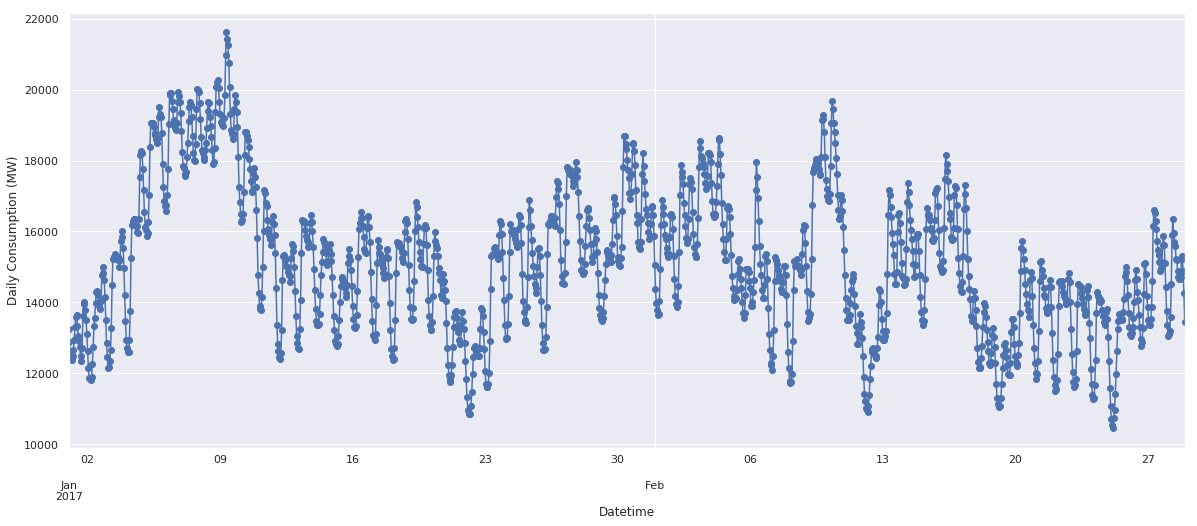

In [0]:
ax = data.set_index('Datetime').loc['2017-01':'2017-02', 'AEP_MW'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (MW)')

Text(0, 0.5, 'Daily Consumption (MW)')

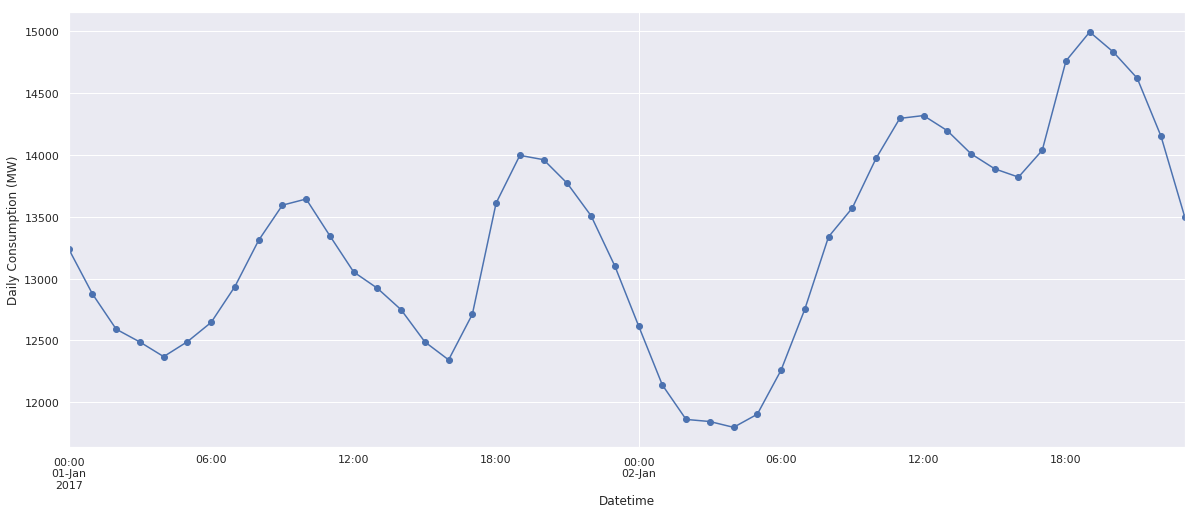

In [0]:
ax = data.set_index('Datetime').loc['2017-01-01':'2017-01-02', 'AEP_MW'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (MW)')

## Autoregression

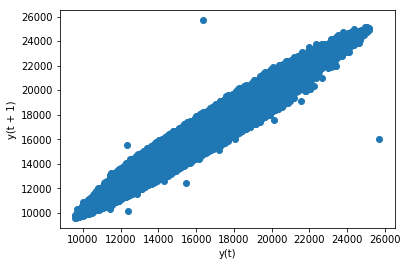

In [0]:
# LAG PLOT for autocorrelation

from pandas.plotting import lag_plot

lag_plot(data['AEP_MW'])
plt.show()

In [0]:
dataframe = pd.concat([data['AEP_MW'].shift(1), data['AEP_MW']], axis=1)
dataframe.columns = ['t-1', 't']
result = dataframe.corr()
print(result)

          t-1         t
t-1  1.000000  0.976223
t    0.976223  1.000000


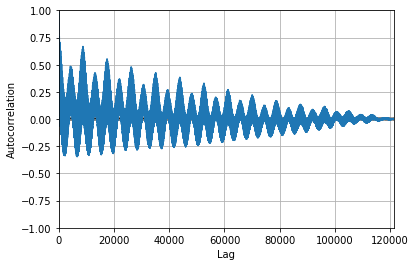

In [0]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['AEP_MW'])
plt.show()

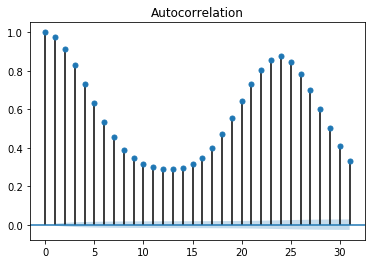

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['AEP_MW'], lags=31)
plt.show()

Lag: 70
Coefficients: [ 7.48533321e+01  1.53073937e+00 -5.92692267e-01  2.33501474e-02
  5.91593910e-02 -5.15343503e-02  1.56143421e-02 -1.60868137e-02
 -4.04389102e-02  3.04326197e-02  5.32785172e-02 -3.48279185e-02
 -2.05369249e-03 -9.22826682e-03  2.70266943e-02 -2.59314974e-02
 -2.65931179e-02  2.71552350e-02  3.71448442e-02 -3.09089338e-02
 -2.48821303e-03 -8.05822872e-03 -1.40127745e-02  1.83552888e-01
  3.46585178e-01 -6.71201024e-01  8.17825374e-02  1.28309492e-01
 -4.38340600e-02 -6.51421060e-03  8.12903520e-03  2.94535554e-02
  1.03126662e-02 -3.32439038e-02  7.82598036e-03 -6.53536265e-03
  1.06650304e-02 -8.87040634e-03  5.79991655e-03  5.71334618e-03
  1.09807028e-02 -4.44188964e-02  2.35804307e-03  3.19383822e-02
  3.94771755e-03  2.75329192e-03 -4.41399729e-02 -3.41091747e-02
  2.39404809e-01 -3.20231391e-01  1.84897651e-01 -2.29143874e-02
 -4.27629298e-02  3.68119627e-02 -2.45387947e-02 -1.74468865e-02
  3.96953313e-02 -2.01662984e-02 -5.16246875e-03  1.31858979e-02
 -4

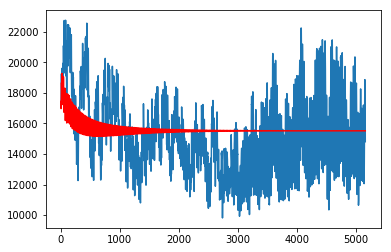

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# train autoregression
model = AR(train.values)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

error = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot results
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

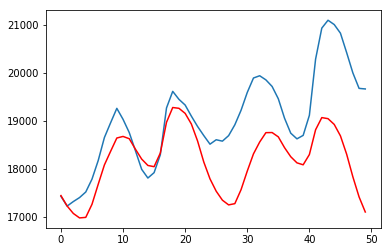

In [0]:
plt.plot(test.values[:50])
plt.plot(predictions[:50], color='red')
plt.show()

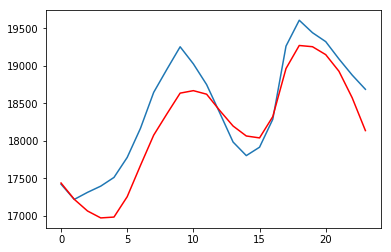

In [0]:
plt.plot(test.values[:24])
plt.plot(predictions[:24], color='red')
plt.show()

Works for a period of < 24 (1 day)

## Moving Average

 MA(q) model is a linear combination of past error terms as opposed to a linear combination of past observations like the AR(p) model.

In [0]:
from statsmodels.tsa.arima_model import ARMA
# fit model
model = ARMA(train.values, order=(0, 1))  ## 0th order AR
model_fit = model.fit(disp=False)
# make prediction start=len(train), end=len(train)+len(test)-1
yhat = model_fit.predict(len(train), len(data)-1)
print(yhat)

[16694.60127253 15508.17764438 15508.17764438 ... 15508.17764438
 15508.17764438 15508.17764438]


In [0]:
yhat

array([16694.60127253, 15508.17764438, 15508.17764438, ...,
       15508.17764438, 15508.17764438, 15508.17764438])

In [0]:
error = math.sqrt(mean_squared_error(test.values, yhat))
print('Test RMSE: %.3f' % error)

Test MSE: 2537.292


## Autoregressive Moving Average (ARMA)

In [0]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train.values, order=(2, 1))   ## Adjust values of p n q
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(train), len(data)-1)
print(yhat)

[17369.9243823  17005.1098556  16675.76611564 ... 15508.17764438
 15508.17764438 15508.17764438]


In [0]:
error = math.sqrt(mean_squared_error(test.values, yhat))
print('Test RMSE: %.3f' % error)

Test MSE: 2537.054


## Autoregressive Integrated Moving Average (ARIMA)


In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train.values, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(train), len(data)-1, typ='levels')
print(yhat)

[17452.505594   17245.46102179 17106.50904111 ... 17061.66226089
 17061.70861176 17061.75496263]


In [0]:
error = math.sqrt(mean_squared_error(test.values, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 3024.846


## LSTM (RNN)

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
numpy.random.seed(7)

In [0]:
train.values

array([[12379.],
       [11935.],
       [11692.],
       ...,
       [18478.],
       [18150.],
       [17761.]])

In [0]:
# Normalization
scaler = MinMaxScaler()
scaler.fit(train.values)
train_norm = scaler.transform(train.values)
test_norm = scaler.transform(test.values)

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
look_back = 23
trainX, trainY = create_dataset(train_norm, look_back)
testX, testY = create_dataset(test_norm, look_back)

In [0]:
print(testX[:5], testY[:5])

[[0.48659551 0.47399777 0.4798312  0.484982   0.49218071 0.50875016
  0.53276654 0.5625543  0.58166811 0.60028547 0.58613628 0.56900832
  0.54542634 0.52147201 0.51023954 0.51719002 0.54027554 0.60084399
  0.62225394 0.61195234 0.60456746 0.5902321  0.57688966]
 [0.47399777 0.4798312  0.484982   0.49218071 0.50875016 0.53276654
  0.5625543  0.58166811 0.60028547 0.58613628 0.56900832 0.54542634
  0.52147201 0.51023954 0.51719002 0.54027554 0.60084399 0.62225394
  0.61195234 0.60456746 0.5902321  0.57688966 0.56509867]
 [0.4798312  0.484982   0.49218071 0.50875016 0.53276654 0.5625543
  0.58166811 0.60028547 0.58613628 0.56900832 0.54542634 0.52147201
  0.51023954 0.51719002 0.54027554 0.60084399 0.62225394 0.61195234
  0.60456746 0.5902321  0.57688966 0.56509867 0.55399032]
 [0.484982   0.49218071 0.50875016 0.53276654 0.5625543  0.58166811
  0.60028547 0.58613628 0.56900832 0.54542634 0.52147201 0.51023954
  0.51719002 0.54027554 0.60084399 0.62225394 0.61195234 0.60456746
  0.5902321

In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# Model
from keras import optimizers

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
adam = optimizers.Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

Epoch 1/80
 - 8s - loss: 0.0027
Epoch 2/80
 - 7s - loss: 4.8445e-04
Epoch 3/80
 - 7s - loss: 3.7356e-04
Epoch 4/80
 - 7s - loss: 3.2844e-04
Epoch 5/80
 - 7s - loss: 3.0326e-04
Epoch 6/80
 - 7s - loss: 2.8460e-04
Epoch 7/80
 - 7s - loss: 2.7371e-04
Epoch 8/80
 - 7s - loss: 2.6532e-04
Epoch 9/80
 - 7s - loss: 2.6075e-04
Epoch 10/80
 - 7s - loss: 2.5622e-04
Epoch 11/80
 - 7s - loss: 2.5151e-04
Epoch 12/80
 - 7s - loss: 2.5249e-04
Epoch 13/80
 - 7s - loss: 2.4927e-04
Epoch 14/80
 - 7s - loss: 2.4692e-04
Epoch 15/80
 - 7s - loss: 2.4484e-04
Epoch 16/80
 - 7s - loss: 2.4042e-04
Epoch 17/80
 - 7s - loss: 2.3654e-04
Epoch 18/80
 - 7s - loss: 2.3454e-04
Epoch 19/80
 - 7s - loss: 2.3274e-04
Epoch 20/80
 - 7s - loss: 2.3159e-04
Epoch 21/80
 - 7s - loss: 2.3139e-04
Epoch 22/80
 - 7s - loss: 2.2781e-04
Epoch 23/80
 - 7s - loss: 2.2690e-04
Epoch 24/80
 - 7s - loss: 2.2577e-04
Epoch 25/80
 - 7s - loss: 2.2546e-04
Epoch 26/80
 - 7s - loss: 2.2315e-04
Epoch 27/80
 - 7s - loss: 2.2207e-04
Epoch 28/80
 -

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Denormalize
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 225.63 RMSE
Test Score: 197.71 RMSE


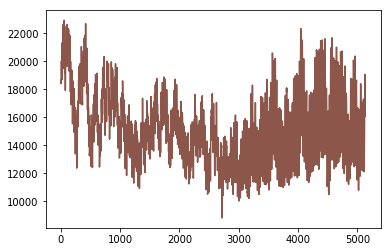

In [0]:
# # shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
plt.plot(testY)
#plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()